## Support Vector Machine

In [29]:
from src.svm_mod import SVM_model
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import src.utils as utils
import seaborn as sns

In [30]:
import importlib
import src.svm_mod
importlib.reload(utils)
importlib.reload(src.svm_mod)

<module 'src.svm_mod' from 'c:\\Users\\musta\\OneDrive\\Escritorio\\machine_learning_project\\ml-project-uab\\src\\svm_mod.py'>

### Without Outliers

In [31]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test= utils.preprocessing_LOS(df)

Let's try to fit the SVM model into our data and observe the score we get without modifying any hyperparameter

In [32]:
# create our classifier and fit it to our data
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = SVM_model(random_state=42)
clf.fit(X_train2, y_train2)

score = clf.score(X_val, y_val)
print("Accuracy: ", score)


Accuracy:  0.7479750365157349


The model gives an accuracy of approximately 0.75. Using **grid search** for a parameter such as C can increase this accuracy. 

- At first, we'll try to set parameter values to default 0, 0.1, 10. 
- Then we identify that the ranges should be more **narrow** in order to get the optimal value for C. 
- We keep on computing grid search until we find a C that cannot be further improved.

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10]}
clf = SVM_model(random_state=42)
grid_search = GridSearchCV(clf, parameters, verbose=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 10} 0.7749389499938546


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [6]:

parameters = {'C':[10, 12, 15]}
clf = SVM_model(random_state=42)
grid_search = GridSearchCV(clf, parameters, verbose=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 15} 0.7759747783530597


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [7]:
parameters = {'C':[14, 15, 16]}
clf = SVM_model(random_state=42)
grid_search = GridSearchCV(clf, parameters, verbose=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 15} 0.7759747783530597


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


We found the best value for C is 15. Now let's fit the model, this time, using our new hyperparameter value that maximizes our accuracy.

In [34]:
# create our classifier with scaling and desired hyperparameters
clf = SVM_model(C=15)
clf.fit(X_train2, y_train2)

score = clf.score(X_val, y_val)
print("Accuracy: ", score)

c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.7759925640685168


Can it be further improved? Let's try setting `class_weight` to balanced to automatically adjust weights inversely proportional to class frequencies in the input data.

In [10]:
# create our classifier with scaling and desired hyperparameters
clf_bal = SVM_model(C=15, class_weight = 'balanced')
clf_bal.fit(X_train2, y_train2)

score = clf_bal.score(X_val, y_val)
print("Accuracy: ", score)

c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy:  0.7673615721683708


Now we'll see that applying a different kernel other than the **radial basis function (rbf)** will potentially diminish our accuracy. This may be due to the nature of the dataset having multiple features and causing the feature space to be non-linear. Applying a polynomial, lineal or sigmoid kernel is not suitable for this problem as we can see in the following scores. Any fine-tuning to these kernel implementations won't be worth it.

In [14]:
# create our classifier with best hyperparameters and a polynomial kernel

kernels = ['linear', 'poly', 'sigmoid'] # 'rbf' is default and is not included
for kernel in kernels:
    clf_k = SVM_model(C=15, kernel=kernel)
    clf_k.fit(X_train2, y_train2)

    score = clf.score(X_val, y_val)
    print("Accuracy of ", kernel,":", score)

c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of  linear : 0.4619572433939716


c:\Users\musta\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of  poly : 0.4619572433939716
Accuracy of  sigmoid : 0.4619572433939716


Let's compute the **metrics** for our final clf model for SVM.

In [17]:
clf.compute_metrics(X_val, y_val)

{'accuracy': 0.7759925640685168,
 'precision': 0.7792792792792793,
 'recall': 0.5874363327674024,
 'f1': 0.669893514036786}

The scores are **low** for the recall and f1. Is it due to an imbalance in classes? Let's test the recall and f1 on the `clf_bal` that has the weights balanced for each class.

In [18]:
clf_bal.compute_metrics(X_val, y_val)

{'accuracy': 0.7673615721683708,
 'precision': 0.6334661354581673,
 'recall': 0.8098471986417657,
 'f1': 0.7108792846497766}

Why is that the recall and f1 have noticeably improved with respect the previous model that didn't have balanced weights for each class?

Let's unfold this by comparing the `value_counts` of both the predicted labels and the target.

In [22]:
result_df = pd.DataFrame({"y_val": y_val, "y_pred": clf.predict(X_val)})
result_counts = result_df.apply(pd.Series.value_counts)
result_counts

,y_val,y_pred
4,3261,3662
3,1932,1822
2,1711,1589
1,589,444
0,38,14


As we can see, we increased the recall and f1 scores but we decreased **precision**. Balancing class weights often helps address issues related to imbalanced datasets by giving more importance to the minority class. However, it might affect precision negatively, as the model becomes more inclusive of positive predictions.

Since, f1 score is much higher (balance between precision and recall) and we're interested on not only having a high accuracy but having every metric relatively high we'll pick the SVM model that has balanced weights.

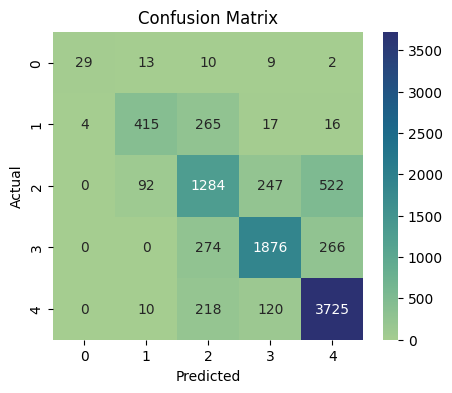

In [23]:
conf_matrix = clf.conf_matrix(X_test, y_test)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="crest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()